In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

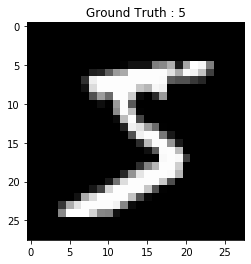

In [3]:
import matplotlib.pyplot as plt

#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

In [4]:
train_images.shape[1:]

(28, 28)

In [5]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [6]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [7]:
#scale data
train_data /=255.0
test_data /=255.0

In [8]:
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [9]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 8s 34ms/step - loss: 0.2740 - accuracy: 0.9158 - val_loss: 0.1139 - val_accuracy: 0.9638
Epoch 2/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0942 - accuracy: 0.9707 - val_loss: 0.0784 - val_accuracy: 0.9766
Epoch 3/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0586 - accuracy: 0.9814 - val_loss: 0.0759 - val_accuracy: 0.9763
Epoch 4/10
235/235 [==============================] - 8s 36ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0835 - val_accuracy: 0.9770
Epoch 5/10
235/235 [==============================] - 8s 32ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0867 - val_accuracy: 0.9774
Epoch 6/10
235/235 [==============================] - 9s 36ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0771 - val_accuracy: 0.9788
Epoch 7/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.1003 - val_accuracy: 0.9760

### using the history object in the source code, plot the loss and accuracy for both training data and validation data. 

In [11]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0974 - accuracy: 0.9809
Evaluation result on Test Data : Loss = 0.09738514572381973, accuracy = 0.98089998960495


In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

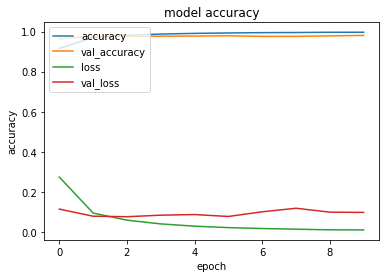

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

### plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image in the test data

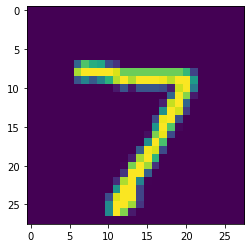

In [14]:
plt.imshow(test_data[0].reshape(28,28));

In [15]:
print("predicted label:",model.predict_classes(test_data[0].reshape(1,784)))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted label: [7]


### We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens

In [16]:
#increasing the number of hidden layers to 4
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss1, test_acc1] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with 4 hidden layers: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))

Epoch 1/10
235/235 [==============================] - 12s 52ms/step - loss: 0.3157 - accuracy: 0.9022 - val_loss: 0.2035 - val_accuracy: 0.9392
Epoch 2/10
235/235 [==============================] - 12s 51ms/step - loss: 0.1055 - accuracy: 0.9680 - val_loss: 0.2257 - val_accuracy: 0.9390
Epoch 3/10
235/235 [==============================] - 13s 55ms/step - loss: 0.0689 - accuracy: 0.9795 - val_loss: 0.1016 - val_accuracy: 0.9728
Epoch 4/10
235/235 [==============================] - 14s 58ms/step - loss: 0.0505 - accuracy: 0.9849 - val_loss: 0.0844 - val_accuracy: 0.9763
Epoch 5/10
235/235 [==============================] - 18s 75ms/step - loss: 0.0402 - accuracy: 0.9880 - val_loss: 0.0775 - val_accuracy: 0.9807
Epoch 6/10
235/235 [==============================] - 18s 77ms/step - loss: 0.0309 - accuracy: 0.9913 - val_loss: 0.0907 - val_accuracy: 0.9802
Epoch 7/10
235/235 [==============================] - 16s 68ms/step - loss: 0.0266 - accuracy: 0.9922 - val_loss: 0.1271 - val_accuracy:

In [17]:
#increasing the dense in hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(612, activation='relu'))
model.add(Dense(712, activation='relu'))
model.add(Dense(812, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss2, test_acc2] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with increase in dense in hidden layers: Loss = {}, accuracy = {}".format(test_loss2, test_acc2))

Epoch 1/10
235/235 [==============================] - 19s 79ms/step - loss: 0.3378 - accuracy: 0.8957 - val_loss: 0.1914 - val_accuracy: 0.9369
Epoch 2/10
235/235 [==============================] - 19s 81ms/step - loss: 0.1100 - accuracy: 0.9674 - val_loss: 0.1278 - val_accuracy: 0.9623
Epoch 3/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0698 - accuracy: 0.9789 - val_loss: 0.1131 - val_accuracy: 0.9728
Epoch 4/10
235/235 [==============================] - 18s 75ms/step - loss: 0.0517 - accuracy: 0.9846 - val_loss: 0.0889 - val_accuracy: 0.9780
Epoch 5/10
235/235 [==============================] - 21s 90ms/step - loss: 0.0403 - accuracy: 0.9886 - val_loss: 0.1086 - val_accuracy: 0.9725
Epoch 6/10
235/235 [==============================] - 17s 72ms/step - loss: 0.0351 - accuracy: 0.9902 - val_loss: 0.1325 - val_accuracy: 0.9769
Epoch 7/10
235/235 [==============================] - 17s 74ms/step - loss: 0.0310 - accuracy: 0.9913 - val_loss: 0.1592 - val_accuracy:

In [18]:
#All hidden layers with tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(612, activation='tanh'))
model.add(Dense(712, activation='tanh'))
model.add(Dense(812, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss3, test_acc3] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with tanh activation: Loss = {}, accuracy = {}".format(test_loss3, test_acc3))

Epoch 1/10
235/235 [==============================] - 17s 71ms/step - loss: 0.6329 - accuracy: 0.8354 - val_loss: 0.2959 - val_accuracy: 0.9094
Epoch 2/10
235/235 [==============================] - 17s 71ms/step - loss: 0.1906 - accuracy: 0.9424 - val_loss: 0.1647 - val_accuracy: 0.9504
Epoch 3/10
235/235 [==============================] - 16s 70ms/step - loss: 0.1183 - accuracy: 0.9638 - val_loss: 0.2577 - val_accuracy: 0.9274
Epoch 4/10
235/235 [==============================] - 17s 71ms/step - loss: 0.0841 - accuracy: 0.9734 - val_loss: 0.1386 - val_accuracy: 0.9610
Epoch 5/10
235/235 [==============================] - 18s 75ms/step - loss: 0.0619 - accuracy: 0.9804 - val_loss: 0.1089 - val_accuracy: 0.9690
Epoch 6/10
235/235 [==============================] - 17s 71ms/step - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.0928 - val_accuracy: 0.9730
Epoch 7/10
235/235 [==============================] - 17s 71ms/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.0869 - val_accuracy:

In [19]:
#All hidden layers with sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(612, activation='sigmoid'))
model.add(Dense(712, activation='sigmoid'))
model.add(Dense(812, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss4, test_acc4] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with sigmoid activation: Loss = {}, accuracy = {}".format(test_loss4, test_acc4))

Epoch 1/10
235/235 [==============================] - 19s 79ms/step - loss: 1.2549 - accuracy: 0.5374 - val_loss: 0.6946 - val_accuracy: 0.7548
Epoch 2/10
235/235 [==============================] - 21s 88ms/step - loss: 0.4456 - accuracy: 0.8587 - val_loss: 0.3358 - val_accuracy: 0.8929
Epoch 3/10
235/235 [==============================] - 20s 87ms/step - loss: 0.2853 - accuracy: 0.9120 - val_loss: 0.2538 - val_accuracy: 0.9237
Epoch 4/10
235/235 [==============================] - 17s 74ms/step - loss: 0.2088 - accuracy: 0.9357 - val_loss: 0.2950 - val_accuracy: 0.9078
Epoch 5/10
235/235 [==============================] - 21s 91ms/step - loss: 0.1659 - accuracy: 0.9488 - val_loss: 0.1528 - val_accuracy: 0.9537
Epoch 6/10
235/235 [==============================] - 18s 77ms/step - loss: 0.1354 - accuracy: 0.9589 - val_loss: 0.1779 - val_accuracy: 0.9477
Epoch 7/10
235/235 [==============================] - 21s 91ms/step - loss: 0.1171 - accuracy: 0.9643 - val_loss: 0.1281 - val_accuracy:

In [20]:
print("Evaluation result on Test Data with 2 hidden layers: Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("Evaluation result on Test Data with 4 hidden layers: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))
print("Evaluation result on Test Data with increase in dense in hidden layers: Loss = {}, accuracy = {}".format(test_loss2, test_acc2))
print("Evaluation result on Test Data with tanh activation: Loss = {}, accuracy = {}".format(test_loss3, test_acc3))
print("Evaluation result on Test Data with sigmoid activation: Loss = {}, accuracy = {}".format(test_loss4, test_acc4))

Evaluation result on Test Data with 2 hidden layers: Loss = 0.09738514572381973, accuracy = 0.98089998960495
Evaluation result on Test Data with 4 hidden layers: Loss = 0.10562571883201599, accuracy = 0.9811000227928162
Evaluation result on Test Data with increase in dense in hidden layers: Loss = 0.11486254632472992, accuracy = 0.9805999994277954
Evaluation result on Test Data with tanh activation: Loss = 0.12818050384521484, accuracy = 0.9696999788284302
Evaluation result on Test Data with sigmoid activation: Loss = 0.18028391897678375, accuracy = 0.9506000280380249


### Run the same code without scaling the images, how the accuracy changes

In [21]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
# print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
# train_data /=255.0
# test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss5, test_acc5] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data without scaling: Loss = {}, accuracy = {}".format(test_loss5, test_acc5))

(28, 28)
Epoch 1/10
235/235 [==============================] - 8s 34ms/step - loss: 4.5541 - accuracy: 0.8833 - val_loss: 1.1596 - val_accuracy: 0.8828
Epoch 2/10
235/235 [==============================] - 7s 30ms/step - loss: 0.4122 - accuracy: 0.9474 - val_loss: 0.7433 - val_accuracy: 0.8995
Epoch 3/10
235/235 [==============================] - 8s 34ms/step - loss: 0.2498 - accuracy: 0.9586 - val_loss: 0.2682 - val_accuracy: 0.9549
Epoch 4/10
235/235 [==============================] - 7s 30ms/step - loss: 0.2087 - accuracy: 0.9659 - val_loss: 0.3024 - val_accuracy: 0.9565
Epoch 5/10
235/235 [==============================] - 8s 33ms/step - loss: 0.1831 - accuracy: 0.9718 - val_loss: 0.3540 - val_accuracy: 0.9604
Epoch 6/10
235/235 [==============================] - 9s 37ms/step - loss: 0.1510 - accuracy: 0.9760 - val_loss: 0.3047 - val_accuracy: 0.9655
Epoch 7/10
235/235 [==============================] - 8s 35ms/step - loss: 0.1376 - accuracy: 0.9784 - val_loss: 0.4001 - val_accurac

In [22]:
print("Evaluation result on Test Data with 2 hidden layers: Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("Evaluation result on Test Data with 4 hidden layers: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))
print("Evaluation result on Test Data with increase in dense in hidden layers: Loss = {}, accuracy = {}".format(test_loss2, test_acc2))
print("Evaluation result on Test Data with tanh activation: Loss = {}, accuracy = {}".format(test_loss3, test_acc3))
print("Evaluation result on Test Data with sigmoid activation: Loss = {}, accuracy = {}".format(test_loss4, test_acc4))
print("Evaluation result on Test Data without scaling: Loss = {}, accuracy = {}".format(test_loss5, test_acc5))

Evaluation result on Test Data with 2 hidden layers: Loss = 0.09738514572381973, accuracy = 0.98089998960495
Evaluation result on Test Data with 4 hidden layers: Loss = 0.10562571883201599, accuracy = 0.9811000227928162
Evaluation result on Test Data with increase in dense in hidden layers: Loss = 0.11486254632472992, accuracy = 0.9805999994277954
Evaluation result on Test Data with tanh activation: Loss = 0.12818050384521484, accuracy = 0.9696999788284302
Evaluation result on Test Data with sigmoid activation: Loss = 0.18028391897678375, accuracy = 0.9506000280380249
Evaluation result on Test Data without scaling: Loss = 0.39635056257247925, accuracy = 0.9670000076293945
